In [6]:
# gets a list of values and a tolerance that is 5 digits by default, and returns how many 
# unique elements there are in the list
def repeats_in_list(lst: list, tolerance: int = 5) -> int:
    seen = []
    num = 0
    for i in lst:
        if not round(i, tolerance) in seen:
            num += 1
            seen.append(round(i, tolerance))
    return num

# returns which elements from r_values have a period of period
def get_r_values_with_period(values, r_values, period):
    accepted_r_values = []
    
    for i in range(len(values)):
        if repeats_in_list(values[i], 15) == period:
            accepted_r_values.append(r_values[i])

    return accepted_r_values

# gets a list of numbers and orders them according to the Sharkovsky order
def sharkovsky_order(lst):
    # gets num and returns (n, m) such that m*(2**n) = num
    def sharkovsky_order_values(num):
        num = int(num)
        count = 0
        while num % 2 == 0:
            num = num//2
            count += 1
        return count, num
    
    broken_up = list(map(sharkovsky_order_values, lst))
    powers_of_two = []
    non_powers_of_two = []
    for i in broken_up:
        if i[1] == 1:
            powers_of_two.append(2**i[0])
        else:
            non_powers_of_two.append(i)
    
    max_power = non_powers_of_two[0][0]
    for i in non_powers_of_two:
        if i[0] > max_power:
            max_power = i[0]
    
    semi_ordered = [[] for i in range(max_power+1)]
    for i in non_powers_of_two:
        semi_ordered[i[0]].append(i[1])
        
    for i in semi_ordered:
        i.sort()
    powers_of_two.sort(reverse=True)
    
    ordered = []
    for i in range(len(semi_ordered)):
        for item in semi_ordered[i]:
            ordered.append(item*(2**i))
    ordered += powers_of_two
    
    return ordered

# if returns -1 there is no streak
def first_index_of_streak(lst, num, streak, allowed_jump = 1):
    start_index = -1
    curr = 0
    for i in range(len(lst)):
        if lst[i] == num or lst[i+allowed_jump] == num:
            if curr == 0:
                start_index = i
            curr += 1
        else:
            if curr >= streak:
                return start_index
            else:
                curr = 0
    return -1


# **Question 1**

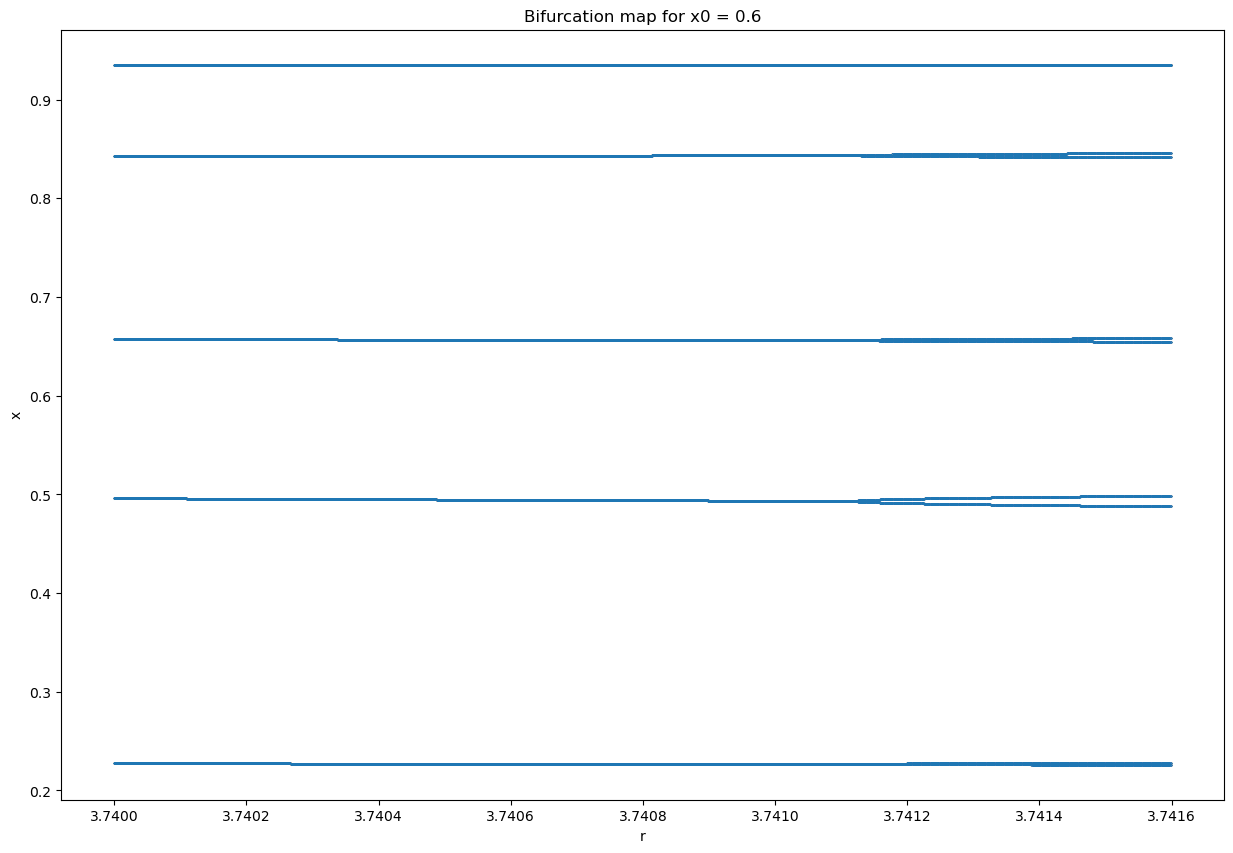

r_values with a period of 15: [3.7403408000000002, 3.7404368000000003, 3.740548, 3.7405912000000003, 3.7406424, 3.740672, 3.7407000000000004, 3.7408616, 3.741, 3.741024, 3.7412552, 3.7412664, 3.7412688000000003, 3.741384, 3.7414008, 3.741424, 3.7414472, 3.7415088]


In [93]:
import matplotlib.pyplot as plt

data_size = 10000
res = 2000
N = 200

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.74
b = 3.7416

r = [0]*res

for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[-N:]

plt.scatter([[r[i]]*N for i in range(res)], final, s=0.001)
plt.title(f"Bifurcation map for x0 = {x[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

print("r_values with a period of 15: " + str(get_r_values_with_period(final, r, 15)))

a). 3.475  
b). 3.8462  
c). 3.704  
d). 3.7400625  
e). for a period number of 15, r=3.741

# **Question 2**

## **a).**
It is chaotic and not sensitive to the starting conditions.

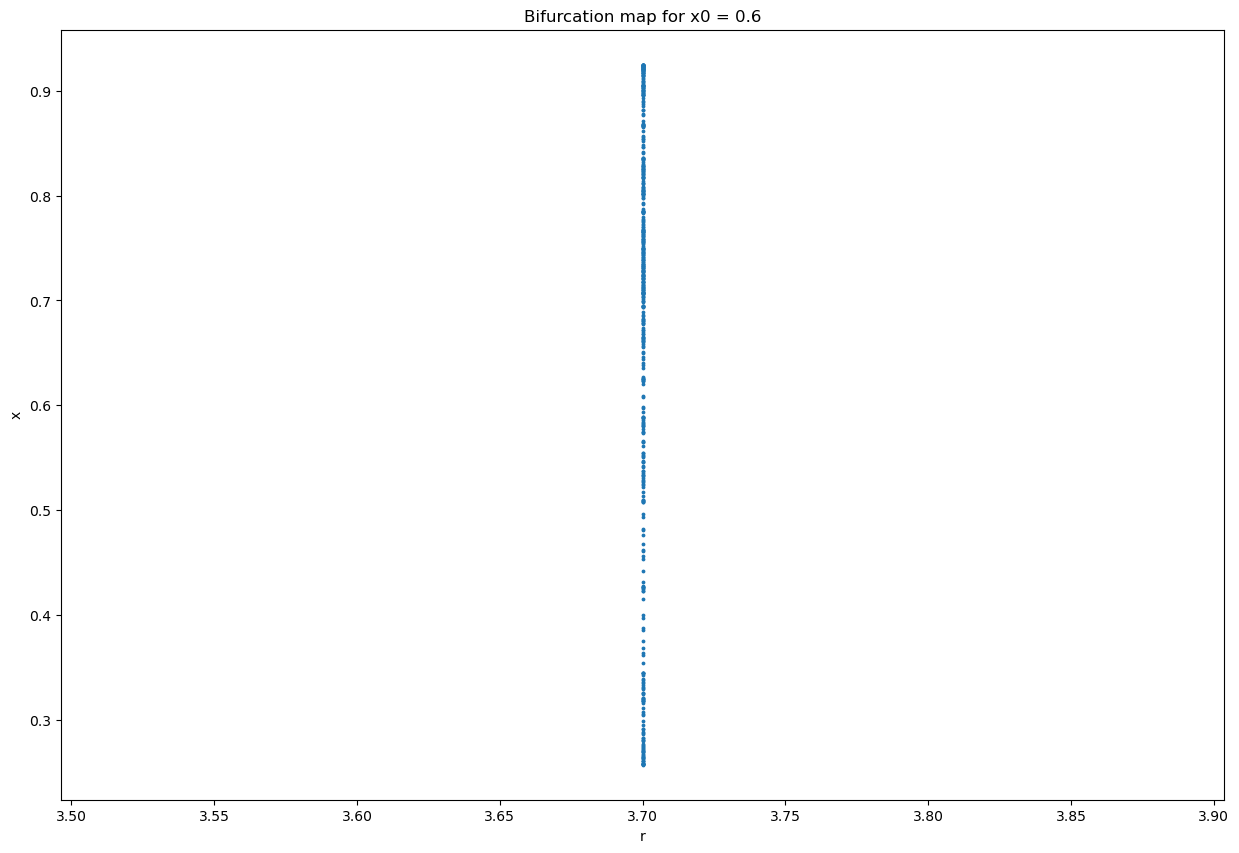

Amount of unique values relative to amount of used values: 495/500


In [67]:
import matplotlib.pyplot as plt

data_size = 10000
res = 1
N = 500

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.7
b = 3.7

r = [0]*res

for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[-N:]

plt.scatter([[r[i]]*N for i in range(res)], final, s=3)
plt.title(f"Bifurcation map for x0 = {x[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

print(f"Amount of unique values relative to amount of used values: {repeats_in_list(final[0])}/{N}")

From the above graph and text we can infer that this orbit is chaotic.

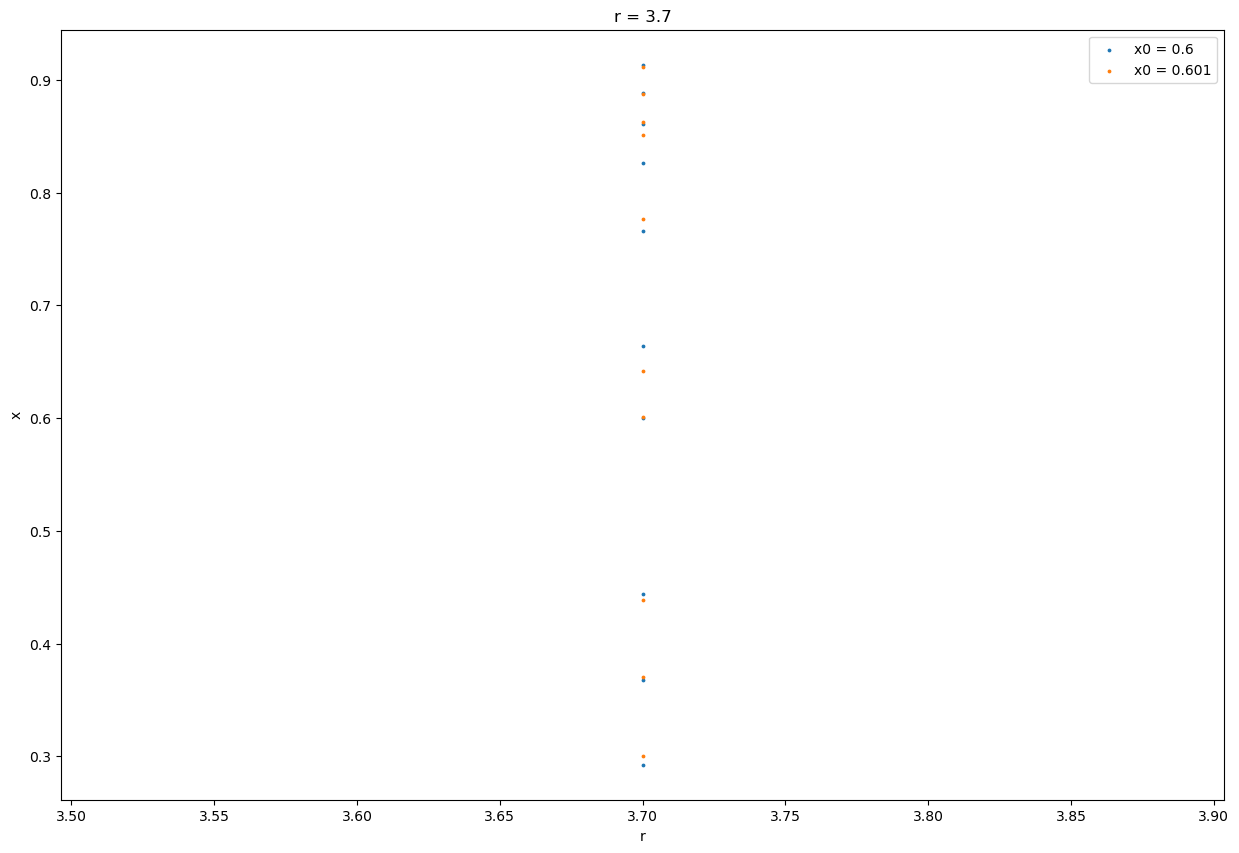

In [80]:
import matplotlib.pyplot as plt

data_size = 10000
res = 1
N = 10

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.7
b = 3.7

r = [0]*res

for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[:N]

plt.scatter([[r[i]]*N for i in range(res)], final, s=3, label=f"x0 = {x[0]}")

x[0] = 0.601
for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[:N]
plt.scatter([[r[i]]*N for i in range(res)], final, s=3, label=f"x0 = {x[0]}")

plt.legend()
plt.title(f"r = {r[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

and from these two graphs we can infer that it is sensitive to the starting conditions.

## **b).**
It is periodic with a period of 3 and sensitive to starting conditions

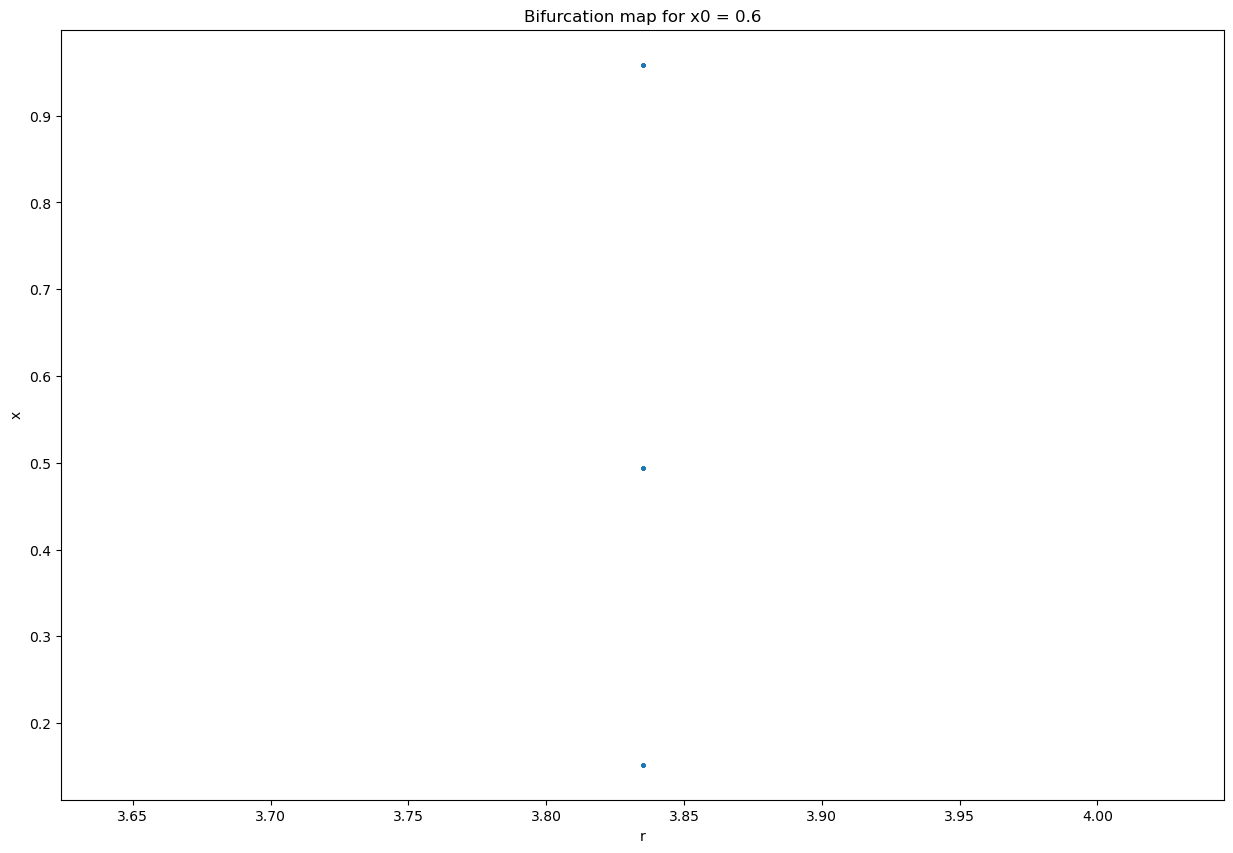

Amount of unique values relative to amount of used values: 3/500


In [83]:
import matplotlib.pyplot as plt

data_size = 10000
res = 1
N = 500

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.835
b = 3.835

r = [0]*res

for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[-N:]

plt.scatter([[r[i]]*N for i in range(res)], final, s=3)
plt.title(f"Bifurcation map for x0 = {x[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

print(f"Amount of unique values relative to amount of used values: {repeats_in_list(final[0])}/{N}")

From the above graph and text we can infer that this orbit is periodic with a period of 3.

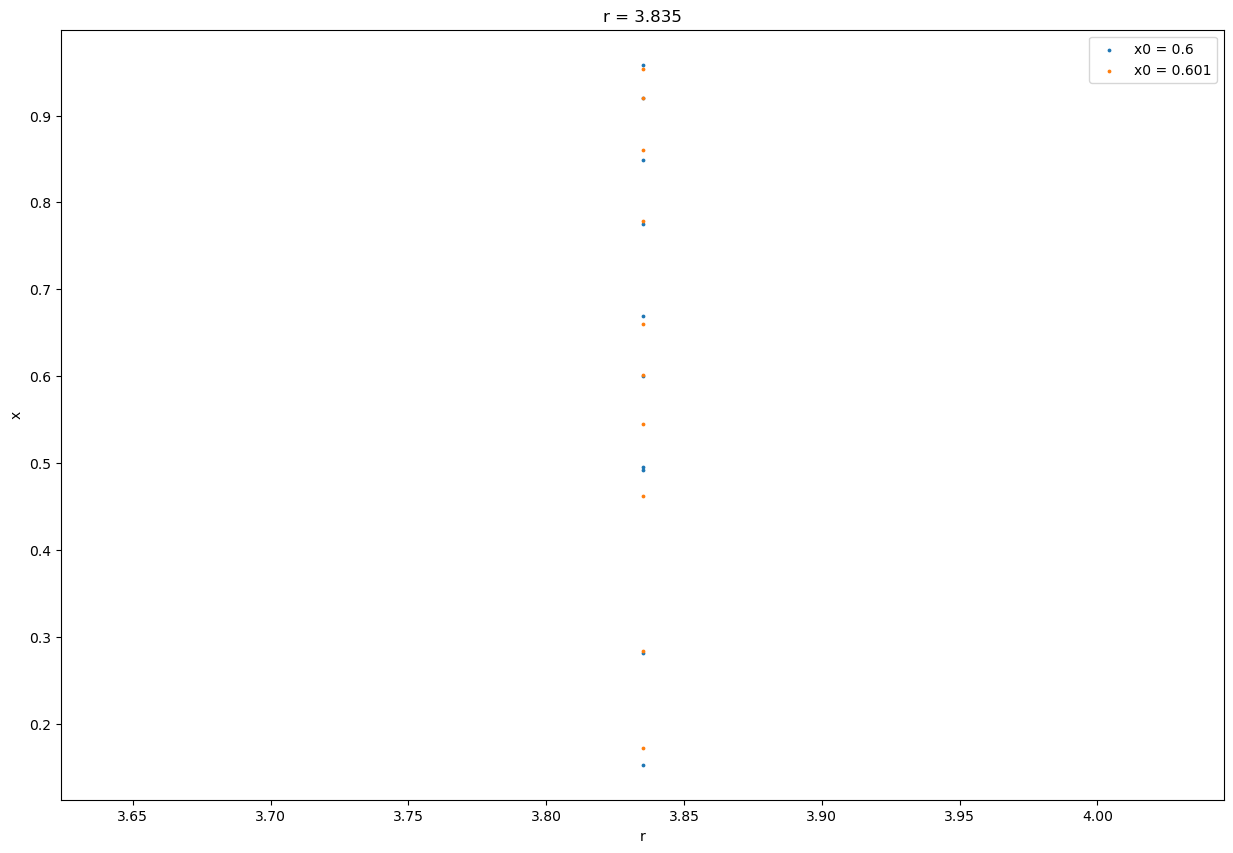

In [82]:
import matplotlib.pyplot as plt

data_size = 10000
res = 1
N = 10

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.835
b = 3.835

r = [0]*res

for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[:N]

plt.scatter([[r[i]]*N for i in range(res)], final, s=3, label=f"x0 = {x[0]}")

x[0] = 0.601
for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[:N]
plt.scatter([[r[i]]*N for i in range(res)], final, s=3, label=f"x0 = {x[0]}")

plt.legend()
plt.title(f"r = {r[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

and from these two graphs we can infer that it is sensitive to the starting conditions

## **c).**
It is periodic with a period number of 414 and not very sensitive to starting conditions

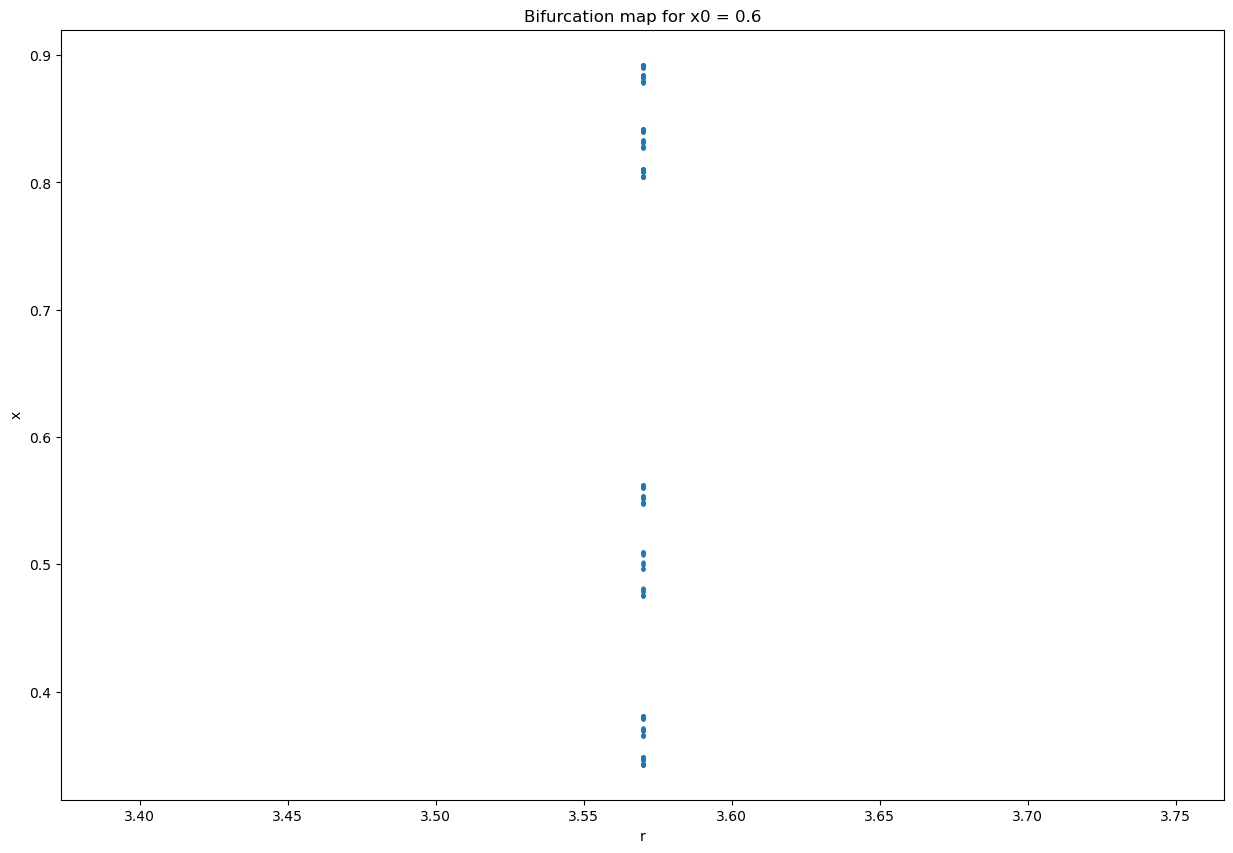

Amount of unique values relative to amount of used values: 414/500


In [92]:
import matplotlib.pyplot as plt

data_size = 1500000
res = 1
N = 500

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.5699456718695445

r = [0]*res

for j in range(res):
    r[j] = a
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[-N:]

plt.scatter([[r[i]]*N for i in range(res)], final, s=3)
plt.title(f"Bifurcation map for x0 = {x[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

print(f"Amount of unique values relative to amount of used values: {repeats_in_list(final[0])}/{N}")

From the above graph and text we can infer that this orbit is not chaotic, and has a period number of 414.

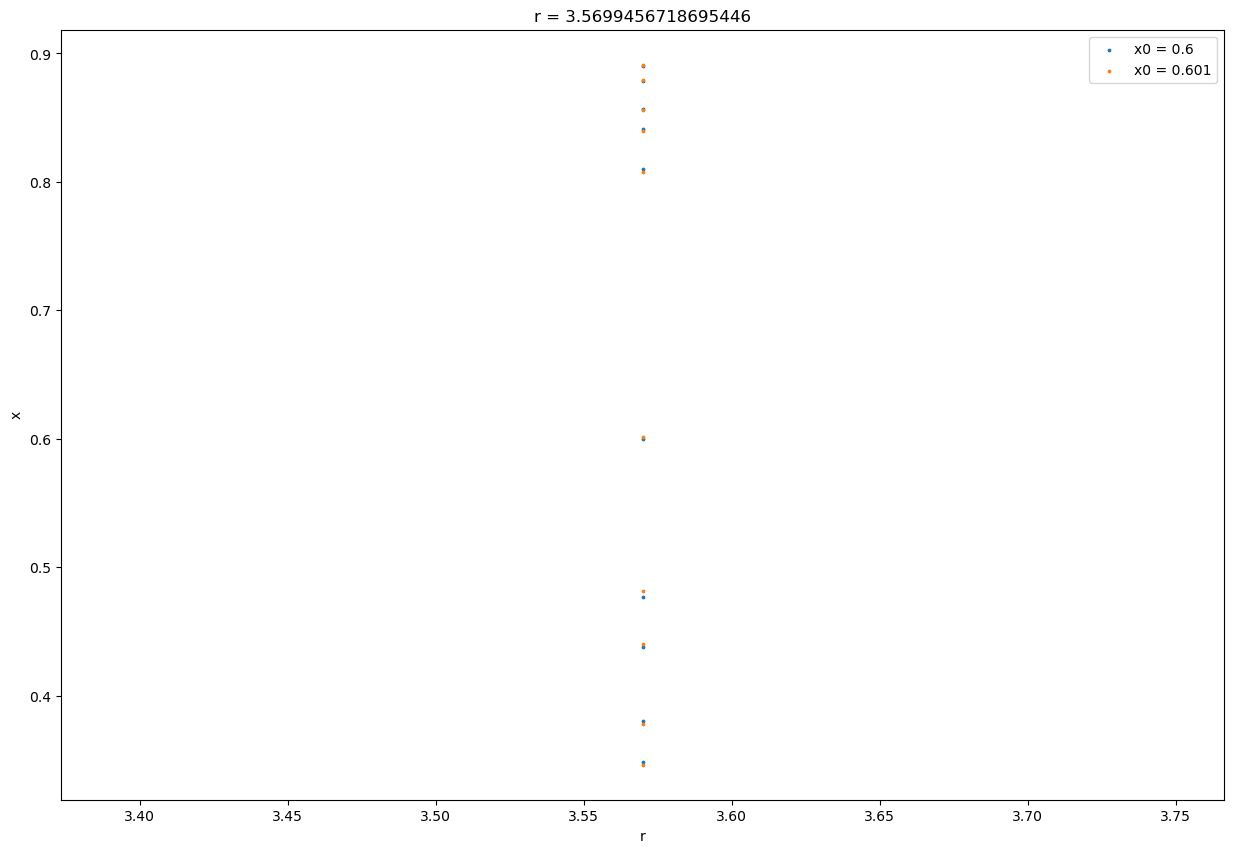

In [86]:
import matplotlib.pyplot as plt

data_size = 10000
res = 1
N = 10

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.5699456718695445

r = [0]*res

for j in range(res):
    r[j] = a
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[:N]

plt.scatter([[r[i]]*N for i in range(res)], final, s=3, label=f"x0 = {x[0]}")

x[0] = 0.601
for j in range(res):
    r[j] = a
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[:N]
plt.scatter([[r[i]]*N for i in range(res)], final, s=3, label=f"x0 = {x[0]}")

plt.legend()
plt.title(f"r = {r[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.show()

and from these two graphs we can infer that it is not very sensitive to the starting conditions

# **Question 3**

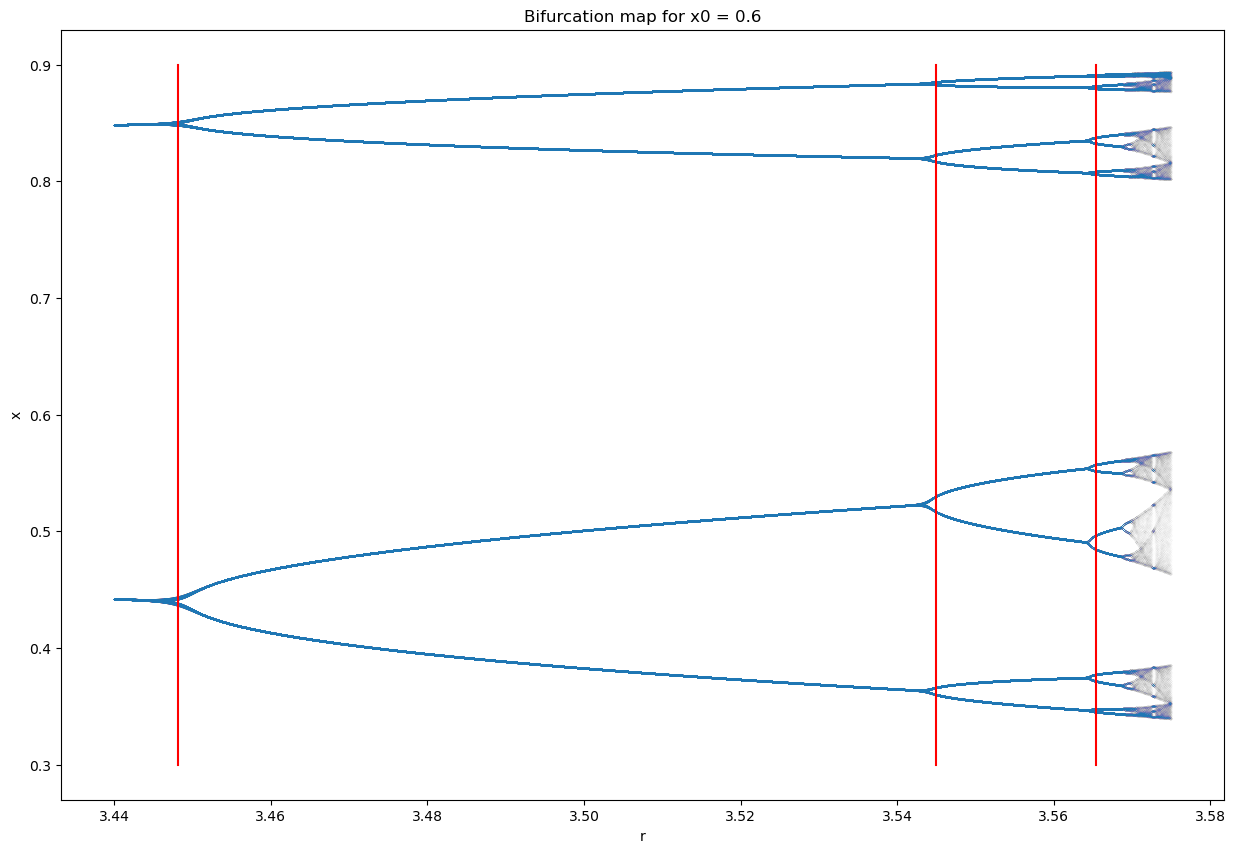

r1=3.0
r2=3.4481135
r3=3.5449625
r4=3.565442
4.62692955012441
4.729070533948596


In [16]:
import matplotlib.pyplot as plt

data_size = 500
res = 20_000
N = 200

plt.rcParams["figure.figsize"] = (15, 10)

final = [[0]*N]*res
x = [0]*data_size
t = [0]*data_size

x[0] = 0.6
a = 3.44
b = 3.575

r = [0]*res

for j in range(res):
    r[j] = a + (b-a)/res*j
    
    for i in range(data_size - 1):
        x[i+1] = r[j]*(x[i])*(1-x[i])
        t[i+1] = t[i] + 1
    
    final[j] = x[-N:]

repeats = [0]*len(final)

for i in range(len(final)):
    repeats[i] = repeats_in_list(final[i])

r1 = 3.0

wanted_streak = 60
jump = 3
r2 = r[first_index_of_streak(repeats, 4, wanted_streak) - 1100]
r3 = r[first_index_of_streak(repeats, 8, wanted_streak) - 200]
r4 = r[first_index_of_streak(repeats, 16, wanted_streak)]


plt.scatter([[r[i]]*N for i in range(res)], final, s=0.00001)
plt.title(f"Bifurcation map for x0 = {x[0]}")
plt.ylabel("x")
plt.xlabel("r")
plt.plot([r2, r2], [0.3, 0.9], color="red")
plt.plot([r3, r3], [0.3, 0.9], color="red")
plt.plot([r4, r4], [0.3, 0.9], color="red")
plt.show()


print(f"r1={r1}\nr2={r2}\nr3={r3}\nr4={r4}")
print((r2 - r1)/(r3 - r2))
print((r3 - r2)/(r4 - r3))

## a).
r1=3.0  
r2=3.4481135  
r3=3.5449625  
r4=3.565442  

## b).
$\delta_1 = \frac{r_2 - r_1}{r_3 - r_2} = 4.62692955012441$

## c).
$\delta_2 = \frac{r_3 - r_2}{r_4 - r_3} = 4.729070533948596$